
# Testing results in terms of performance scores

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


# Load the CSV file
results_df = pd.read_csv(r'../results.csv')


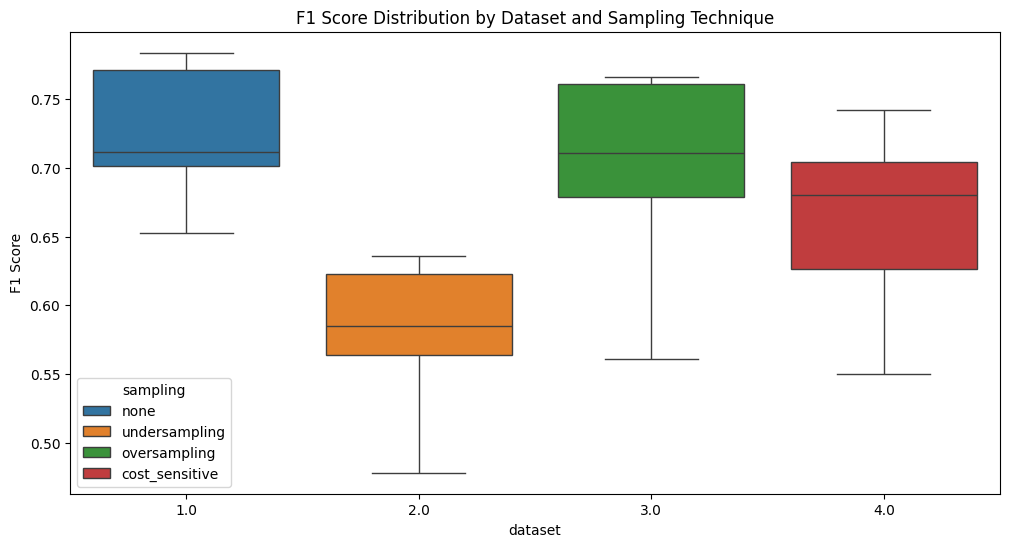

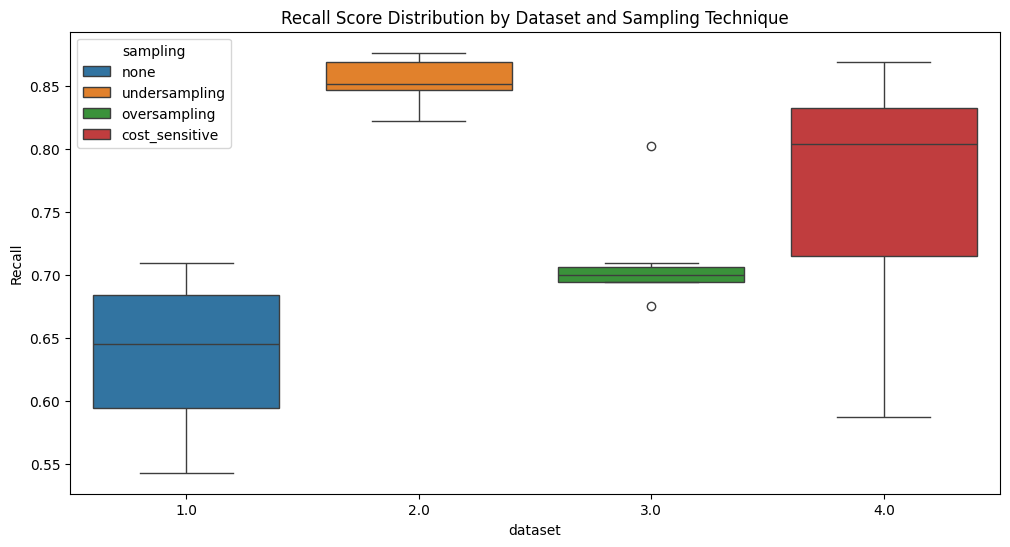

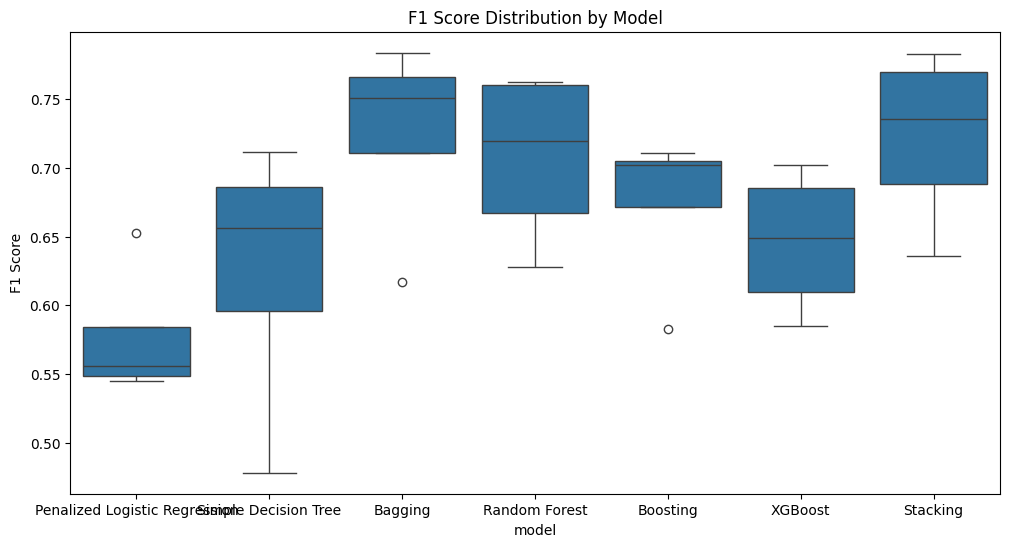

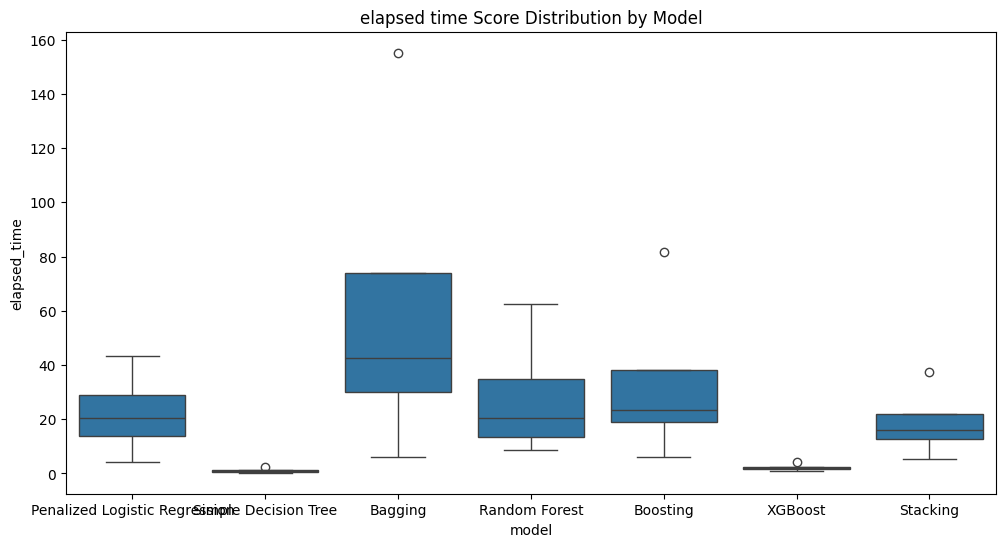

In [3]:
# 1. Average Performance Scores by Dataset and Sampling Technique
plt.figure(figsize=(12, 6))
sns.boxplot(x='dataset', y='F1 Score', hue='sampling', data=results_df)
plt.title('F1 Score Distribution by Dataset and Sampling Technique')
plt.show()

# 1. Average Performance Scores by Dataset and Sampling Technique
plt.figure(figsize=(12, 6))
sns.boxplot(x='dataset', y='Recall', hue='sampling', data=results_df)
plt.title('Recall Score Distribution by Dataset and Sampling Technique')
plt.show()

# 2. Performance Comparison of Different Models
plt.figure(figsize=(12, 6))
sns.boxplot(x='model', y='F1 Score', data=results_df)
plt.title('F1 Score Distribution by Model')
plt.show()

# 2. Performance Comparison of Different Models
plt.figure(figsize=(12, 6))
sns.boxplot(x='model', y='elapsed_time', data=results_df)
plt.title('elapsed time Score Distribution by Model')
plt.show()


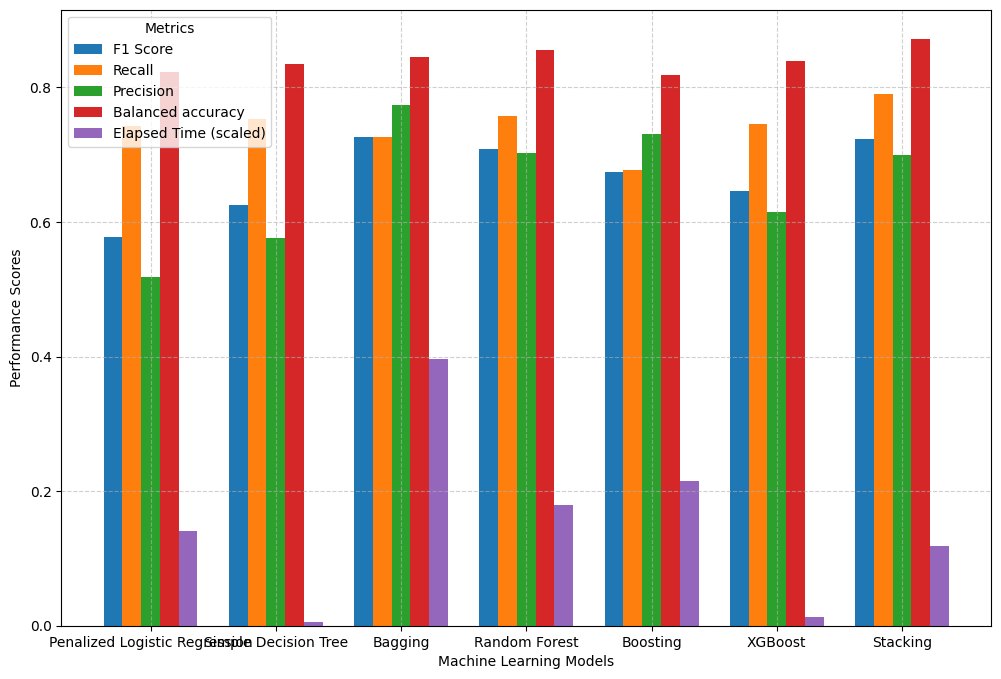

In [ ]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Define the metrics, including elapsed time
metrics = ['F1 Score', 'Recall', 'Precision', 'Balanced accuracy']
models = results_df['model'].unique()

# Min-Max scale the elapsed_time to fit between 0 and 1
scaler = MinMaxScaler()
results_df['scaled_elapsed_time'] = scaler.fit_transform(results_df[['elapsed_time']])

# Add 'scaled_elapsed_time' to the metrics
metrics.append('scaled_elapsed_time')

# Set a more distinct but muted color palette (use professional shades)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # Muted blue, orange, green, red, purple

x = np.arange(len(models))  # the label locations (for models)
width = 0.15  # the width of the bars
spacing = 0.3  # additional space between model groups

# Loop over each metric and plot the bars for all models for that metric
for i, metric in enumerate(metrics):
    metric_scores = [results_df[results_df['model'] == model_name][metric].mean() for model_name in models]

    # Shift the bars by width * i and leave space between the groups using spacing
    plt.bar(x + i * width, metric_scores, width, label=metric if metric != 'scaled_elapsed_time' else 'Elapsed Time (scaled)', color=colors[i % len(colors)])

# Add labels, title, and legend
plt.xlabel('Machine Learning Models')
plt.ylabel('Performance Scores')

# Adjust the xticks to be centered: shift by half the total bar width for each group
plt.xticks(x + (len(metrics) - 1) * width / 2, models)

# Make the plot more readable and professional for reports
plt.legend(title="Metrics")
plt.grid(True, linestyle='--', alpha=0.6)  # Adding light grid lines

# Show the plot
plt.show()


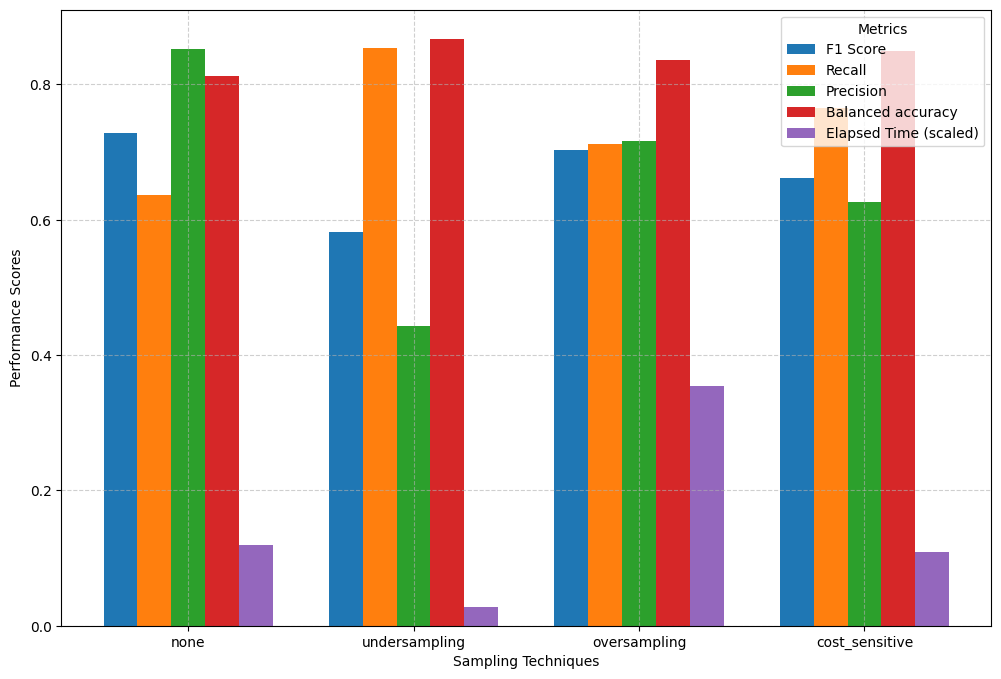

In [ ]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Define the metrics, including elapsed time
metrics = ['F1 Score', 'Recall', 'Precision', 'Balanced accuracy']
sampling = results_df['sampling'].unique()

# Min-Max scale the elapsed_time to fit between 0 and 1
scaler = MinMaxScaler()
results_df['scaled_elapsed_time'] = scaler.fit_transform(results_df[['elapsed_time']])

# Add 'scaled_elapsed_time' to the metrics
metrics.append('scaled_elapsed_time')

# Set a distinct but muted color palette (use professional shades)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # Muted blue, orange, green, red, purple

x = np.arange(len(sampling))  # the label locations (for sampling techniques)
width = 0.15  # the width of the bars
spacing = 0.3  # additional space between sampling technique groups

# Loop over each metric and plot the bars for all sampling techniques for that metric
for i, metric in enumerate(metrics):
    metric_scores = [results_df[results_df['sampling'] == technique][metric].mean() for technique in sampling]

    # Shift the bars by width * i and leave space between the groups using spacing
    plt.bar(x + i * width, metric_scores, width, label=metric if metric != 'scaled_elapsed_time' else 'Elapsed Time (scaled)', color=colors[i % len(colors)])

# Add labels, title, and legend
plt.xlabel('Sampling Techniques')
plt.ylabel('Performance Scores')

# Adjust the xticks to be centered: shift by half the total bar width for each group
plt.xticks(x + (len(metrics) - 1) * width / 2, sampling)

# Make the plot more readable and professional for reports
plt.legend(title="Metrics")
plt.grid(True, linestyle='--', alpha=0.6)  # Adding light grid lines

# Show the plot
plt.show()
